# Análise exploratória de dados

In [1]:
# importação de bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## 01. Descrição dos dados

<picture>
  <img src="https://github.com/allisonhorst/palmerpenguins/raw/main/man/figures/lter_penguins.png" 
       alt="Os Pinguins da pesquisa palmerpenguins" 
       width="600" 
       style="display: block; margin: auto;">
</picture>


**Quantidade de instâncias**: O conjunto de dados tem 344 pinguins, pertencentes a três espécies, coletados em três ilhas diferentes no Arquipélago Palmer.

**Variaveis**: 
*species*: Representa a espécie da ave. Tipo qualitativo nominal.
*island*: Indica a ilha onde a ave foi observada. Tipo qualitativo nominal. 
*bill_length_mm*: Comprimento do bico da ave em milímetros. Tipo quantitativo contínuo. 
*bill_depth_mm*:  Profundidade do bico da ave em milímetros. Tipo quantitativo contínuo.
*flipper_length_mm*:  Comprimento da nadadeira da ave em milímetros. Tipo quantitativo contínuo. 
*body_mass_g*: Massa corporal da ave em gramas. Tipo quantitativo contínuo. 
*sex*: Indica o sexo da ave (MALE ou FEMALE). Tipo qualitativo nominal.

**Valores faltantes:** Alguns valores estão ausentes nas colunas de bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g e sex para uma instância da espécie Adelie e Gentoo. Isso deve ser levado em consideração durante a análise, como a necessidade de preencher ou remover valores ausentes.

**Legenda:** As cores são inspiradas na mesma cor do desenho do próprio conjunto de dados. 
- **Adelie** na cor laranja <span style="color:#FF8100">**#FF8100**</span>, 
- **Chinstrap** na cor lilás <span style="color:#C95BCB">**#C95BCB**</span>, 
- **Gentoo** na cor verde azulado <span style="color:#067176">**#067176**</span>.

In [2]:
# leitura e amostra de dados
df = pd.read_csv("../data/raw/data.csv")
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


#### Dicionário de dados

In [3]:
dictionary = '../data/external/dictionary.csv'
dt_dict = pd.read_csv(dictionary)

# Exibe dicionário
dt_dict

,variavel,descricao,tipo,subtipo
0,species,Espécie de ave,qualitativa,nominal
1,island,Ilha onde a ave foi observada,qualitativa,nominal
2,bill_length_mm,Comprimento do bico de ave em milímetros,quantitativa,contínua
3,bill_depth_mm,Profundidade do bico da ave em milímetros,quantitativa,contínua
4,flipper_length_mm,Comprimento da nadadeira da ave em milímetros,quantitativa,contínua
5,body_mass_g,Massa corporal da ave em gramas,quantitativa,contínua
6,sex,Sexo da ave (Male ou Female).,qualitativa,nominal


#### Tratamento do conjunto de dados

In [4]:
#EN -> PT
df.rename(columns = {
        'species': 'especies',
        'island': 'ilha',
        'bill_length_mm': 'comprimento_do_bico_mm',
        'bill_depth_mm': 'profundidade_do_bico_mm',
        'flipper_length_mm': 'comprimento_do_nadadeira_mm',
        'body_mass_g': 'massa_corporal_g',
        'sex': 'sexo',
}, inplace=True)

#substituição dos valores pela descrição com replace
df.replace ({'sexo':{
        'MALE':'Masculino',
        'FEMALE':'Feminino'
}}, inplace=True)

display(df.head())

,especies,ilha,comprimento_do_bico_mm,profundidade_do_bico_mm,comprimento_do_nadadeira_mm,massa_corporal_g,sexo
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Masculino
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Feminino
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Feminino
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Feminino


#### Dados Faltantes

In [5]:
# colunas (variáveis) contendo valores valtantes
number_column = df.isnull().sum().loc[lambda x: x > 0]
number_rows = df.isnull().any(axis=1).sum()

display(number_column)
df.dropna(inplace=True)

print("____________________________________________________________________________________________________________")

print(f"A partir dessa informação sabemos que as variáveis {number_column.axes[0].to_list()} contém valores faltantes.")
print(" ")
print(f"Além disso sabemos que temos {number_rows} linhas com valores faltantes.")

comprimento_do_bico_mm          2
profundidade_do_bico_mm         2
comprimento_do_nadadeira_mm     2
massa_corporal_g                2
sexo                           11
dtype: int64

____________________________________________________________________________________________________________
A partir dessa informação sabemos que as variáveis ['comprimento_do_bico_mm', 'profundidade_do_bico_mm', 'comprimento_do_nadadeira_mm', 'massa_corporal_g', 'sexo'] contém valores faltantes.
 
Além disso sabemos que temos 11 linhas com valores faltantes.


**As próximas análises aqui serão realizadas sem considerar os dados faltantes**

#### Resumo Estatísticos de Colunas Numéricas

In [6]:
df.describe(include='all').round(2)

,especies,ilha,comprimento_do_bico_mm,profundidade_do_bico_mm,comprimento_do_nadadeira_mm,massa_corporal_g,sexo
count,333,333,333.00,333.00,333.00,333.00,333
unique,3,3,NaN,NaN,NaN,NaN,2
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,Masculino
freq,146,163,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.99,17.16,200.97,4207.06,NaN
std,NaN,NaN,5.47,1.97,14.02,805.22,NaN
min,NaN,NaN,32.10,13.10,172.00,2700.00,NaN
25%,NaN,NaN,39.50,15.60,190.00,3550.00,NaN
50%,NaN,NaN,44.50,17.30,197.00,4050.00,NaN
75%,NaN,NaN,48.60,18.70,213.00,4775.00,NaN


#### Média dividido por Espécies, Sexo e Ilhas

In [7]:
data = df.groupby(['especies', 'sexo', 'ilha'])[['comprimento_do_bico_mm', 'profundidade_do_bico_mm', 'comprimento_do_nadadeira_mm', 'massa_corporal_g']].median()

# Exiba a tabela formatada
data.style.format("{:.2f}").set_caption("Medida de Médias por Espécies, Sexo e Ilhas")

#### Média do Tamanho das Nadadeiras (em mm) e Massa Corporal (em g) por Espécies

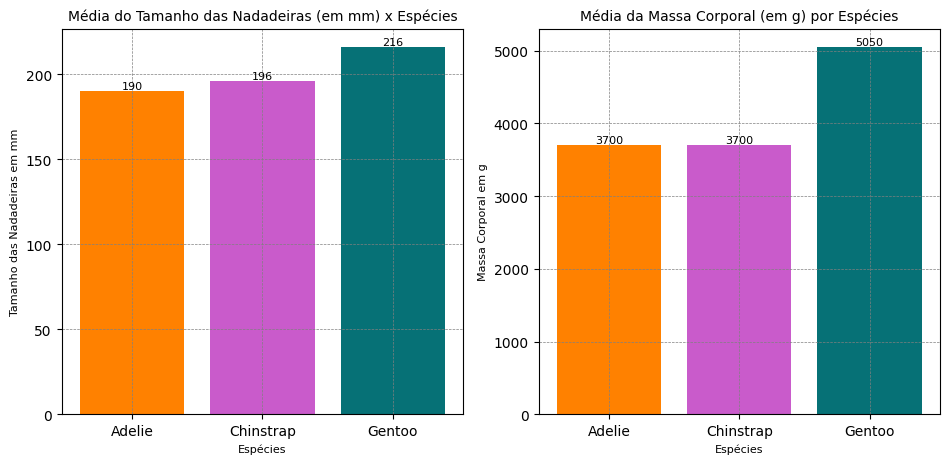

In [8]:
# tamanho do gráfico e cores
plt.figure(figsize=(16, 5))
palette = ['#FF8100','#C95BCB','#067176']

# tamanho
plt.subplot(1,2,1)

# Dados
# agrupamento por species e o calculo da mediana
df_avg = df.groupby('especies')['comprimento_do_nadadeira_mm'].median().reset_index()
#coloca os números em cima da barra
for i, value in enumerate(df_avg['comprimento_do_nadadeira_mm']):
    plt.text(i, value, round(value), ha='center', va='bottom', fontsize=8)
    
# resultado e ordenação dos dados
df_avg = df_avg.sort_values(by='comprimento_do_nadadeira_mm', ascending=True)

#tipo de gráfico.
plt.bar(df_avg['especies'], df_avg['comprimento_do_nadadeira_mm'], color=palette)
plt.grid(True, linestyle='--', linewidth=0.5, color='grey')

#legendas do titulo, x e y
plt.title('Média do Tamanho das Nadadeiras (em mm) x Espécies', fontsize=10)
plt.xlabel('Espécies', fontsize = 8)
plt.ylabel('Tamanho das Nadadeiras em mm', fontsize = 8)


plt.subplot(1, 2, 2)
# Dados
# agrupamento por species e o calculo da mediana
df_avg = df.groupby('especies')['massa_corporal_g'].median().reset_index()
#coloca os números em cima da barra
for i, value in enumerate(df_avg['massa_corporal_g']):
    plt.text(i, value, round(value), ha='center', va='bottom', fontsize=8)

# resultado e ordenação dos dados
df_avg = df_avg.sort_values(by='massa_corporal_g', ascending=True)

#tipo de gráfico.
plt.bar(df_avg['especies'], df_avg['massa_corporal_g'], color=palette)
plt.grid(True, linestyle='--', linewidth=0.5, color='grey')

#legendas do titulo, x e y
plt.title('Média da Massa Corporal (em g) por Espécies', fontsize=10)
plt.xlabel('Espécies', fontsize = 8)
plt.ylabel('Massa Corporal em g', fontsize = 8)


#ajuste dos gráficos e o plot
plt.tight_layout(rect=[0, 0, 0.6, 0.95]) 
plt.show()

#### Média do Comprimento do Bico (em mm) por Espécies

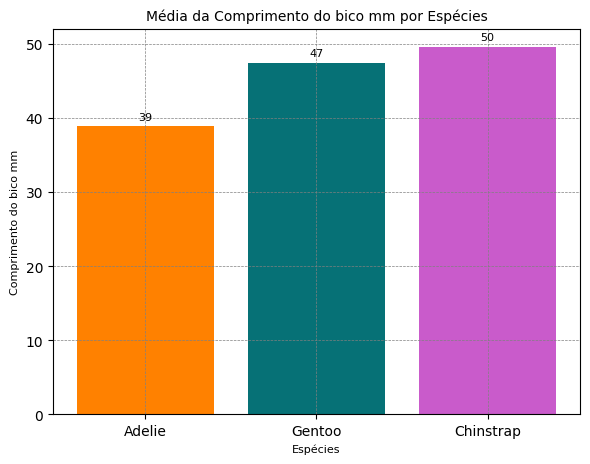

In [9]:
# tamanho do gráfico
plt.figure(figsize=(10, 5))
palette = [ '#FF8100','#067176','#C95BCB']

# Dados
# agrupamento por species e o calculo da mediana
df_avg = df.groupby('especies')['comprimento_do_bico_mm'].median().reset_index()

# resultado e ordenação dos dados
df_avg = df_avg.sort_values(by='comprimento_do_bico_mm', ascending=True)
#coloca os números em cima da barra
for i, value in enumerate(df_avg['comprimento_do_bico_mm']):
    plt.text(i, value+2, round(value), ha='center', va='top', fontsize=8)

#tipo de gráfico.
plt.bar(df_avg['especies'], df_avg['comprimento_do_bico_mm'], color=palette)
plt.grid(True, linestyle='--', linewidth=0.5, color='grey')

#legendas do titulo, x e y
plt.title('Média da Comprimento do bico mm por Espécies', fontsize=10)
plt.xlabel('Espécies', fontsize = 8)
plt.ylabel('Comprimento do bico mm', fontsize = 8)

#ajuste dos gráficos e plot
plt.tight_layout(rect=[0, 0, 0.6, 0.95]) 
plt.show()

#### Distribuição do Sexo entre as Espécies

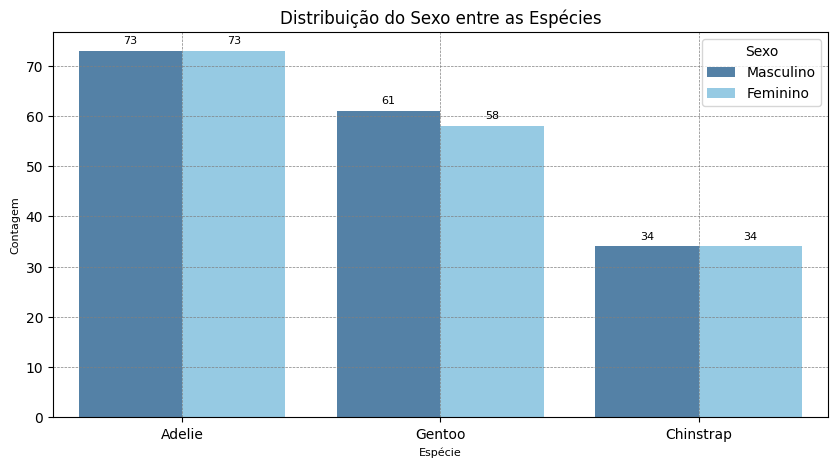

In [10]:
# tamanho do gráfico
plt.figure(figsize=(10,5))

#paleta de cores
palette = ['#4682B4', '#89CFF0']

#ordenar
species_order = df['especies'].value_counts().index
#tipo de gráfico 
sns.countplot(x='especies', hue='sexo', data=df, palette=palette, order=species_order)
plt.grid(True, linestyle='--', linewidth=0.5, color='grey')

#coloca os números em cima da barra
for p in plt.gca().patches:
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    plt.text(x, y + 1, int(y), ha='center', va='bottom', fontsize=8)

#legendas do titulo, x e y
plt.title('Distribuição do Sexo entre as Espécies')
plt.xlabel('Espécie', fontsize = 8)
plt.ylabel('Contagem', fontsize = 8)

#legenda e plot
plt.legend(title='Sexo')
plt.show()

#### Distribuição de Espécies por Ilha

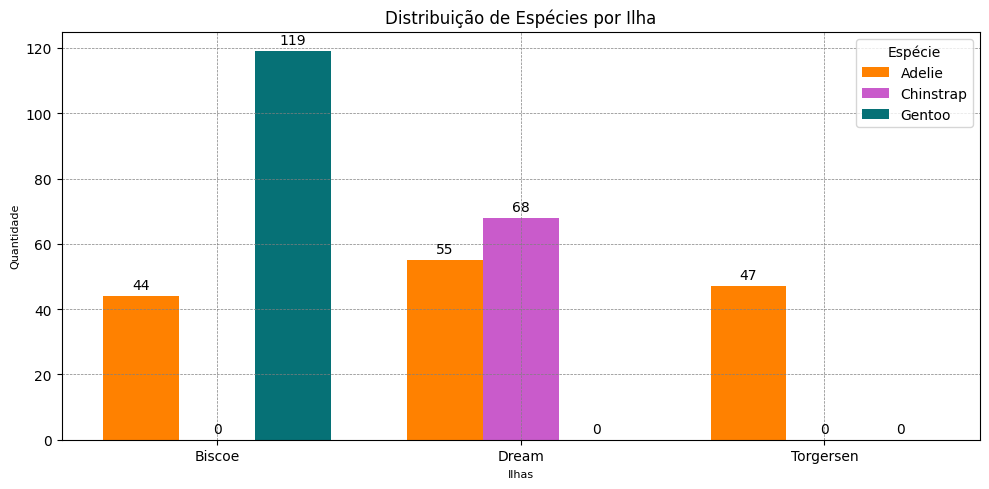

In [11]:
# tamanho do gráfico e cores
fig, ax = plt.subplots(figsize=(10, 5))
palette = ['#FF8100','#C95BCB','#067176']

#agrupamento e contagem
count = df.groupby(['ilha', 'especies']).size().unstack(fill_value=0)

#definição de variaveis
ilhas = count.index
especies = count.columns
x = np.arange(len(ilhas))
width = 0.25  

#loop p adicionar numero no gráfico
for i, especie in enumerate(especies):
    offset = width * i
    rects = ax.bar(x + offset, count[especie], width, label=especie, color=palette[i])
    ax.bar_label(rects, padding=3)
plt.grid(True, linestyle='--', linewidth=0.5, color='grey')

#legendas
ax.set_title('Distribuição de Espécies por Ilha')
ax.set_xlabel('Ilhas', fontsize = 8)
ax.set_ylabel('Quantidade', fontsize = 8)
ax.set_xticks(x + width, ilhas)
ax.legend(loc='upper left', ncols=3)
ax.legend(title='Espécie', loc='upper right' )

#legenda e plot
plt.tight_layout()
plt.show()

## 02. Perguntas de partida e hipóteses

1. O tamanho da massa corporal e do comprimento do bico, da mesma espécies, são diferente entre as ilhas?

**Hipótese**: O tamanho da massa corporal e do comprimento do bico da espécie Adelie, podem ser diferente entre as ilhas, pois pode ocorrer competição de comida.

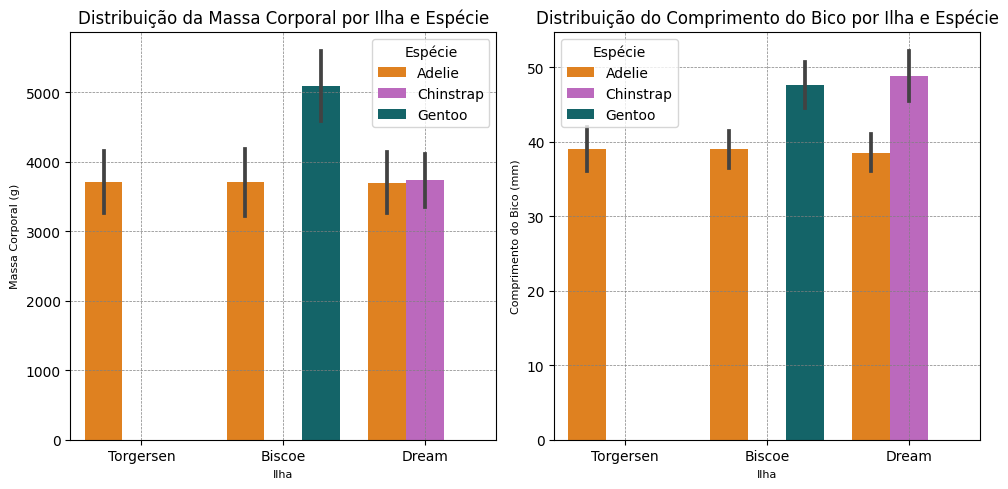

In [12]:
# 01. O tamanho da massa corporal e do comprimento do bico, da mesma espécies, são diferente entre as ilhas?

plt.figure(figsize=(10,5))
palette = [ '#FF8100','#C95BCB','#067176']

# Barra para massa corporal
plt.subplot(1, 2, 1)
#tipo de gráfico 
sns.barplot(x='ilha', y='massa_corporal_g', hue='especies', data=df, palette=palette, ci='sd')
plt.grid(True, linestyle='--', linewidth=0.5, color='grey')

#legendas
plt.title('Distribuição da Massa Corporal por Ilha e Espécie')
plt.xlabel('Ilha', fontsize = 8) 
plt.ylabel('Massa Corporal (g)', fontsize = 8)
plt.legend(title='Espécie')

# Barra para comprimento do bico
plt.subplot(1, 2, 2)
#tipo de gráfico 
sns.barplot(x='ilha', y='comprimento_do_bico_mm', hue='especies', data=df, palette=palette, ci='sd')
plt.grid(True, linestyle='--', linewidth=0.5, color='grey')

#legendas
plt.title('Distribuição do Comprimento do Bico por Ilha e Espécie')
plt.xlabel('Ilha', fontsize = 8) 
plt.ylabel('Comprimento do Bico (mm)', fontsize = 8)
plt.legend(title='Espécie', loc='upper left')

#legenda e plot
plt.tight_layout()
plt.show()

2. Como a massa corporal de pinguins se correlaciona com a dimensão de bicos, entre a mesma espécie?

**Hipótese**: Por ter uma dimensão de bicos menor, pode ingerirmenor quantidade de comida, sendo assim a massa corporea do pinguim pode ser menor do que a dos bicos com dimensão maior.

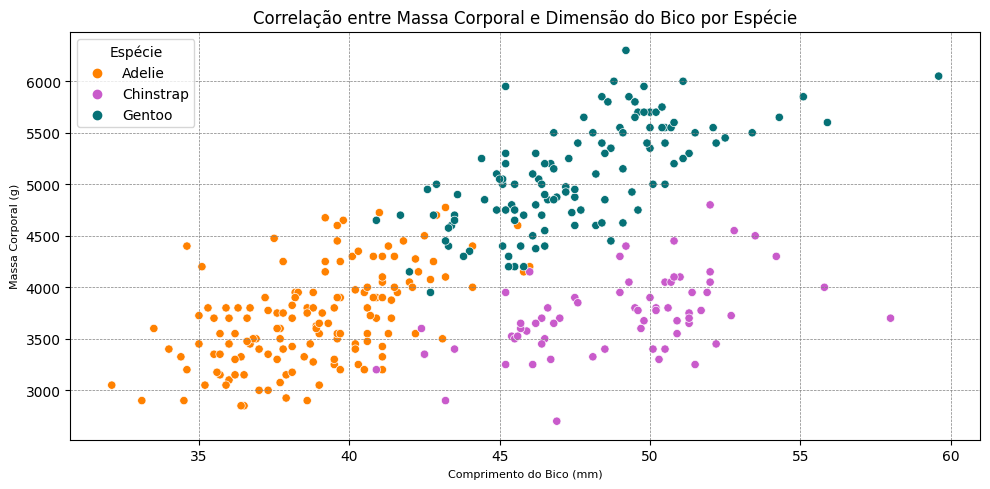

In [13]:
#02. Como a massa corporal de pinguins se correlaciona com a dimensão de bicos, entre a mesma espécie?
plt.figure(figsize=(10, 5))
palette = [ '#FF8100','#C95BCB','#067176']

#tipo de gráfico 
sns.scatterplot(data=df, x='comprimento_do_bico_mm', y='massa_corporal_g', hue='especies', palette=palette)
plt.grid(True, linestyle='--', linewidth=0.5, color='grey')

#legendas
plt.title('Correlação entre Massa Corporal e Dimensão do Bico por Espécie')
plt.xlabel('Comprimento do Bico (mm)', fontsize = 8)
plt.ylabel('Massa Corporal (g)', fontsize = 8)
plt.legend(title='Espécie')

plt.tight_layout()
plt.show()

03. Há diferente entre a dimensão dos bicos e massa corpórea entre os sexos, em cada espécie?

**Hipótese**: Pode ser que a fêmea tem os bicos menores, para poder alimentar melhor os filhotes, e a massa corporea pode ser menor também por que a femea alimenta os filhotes.


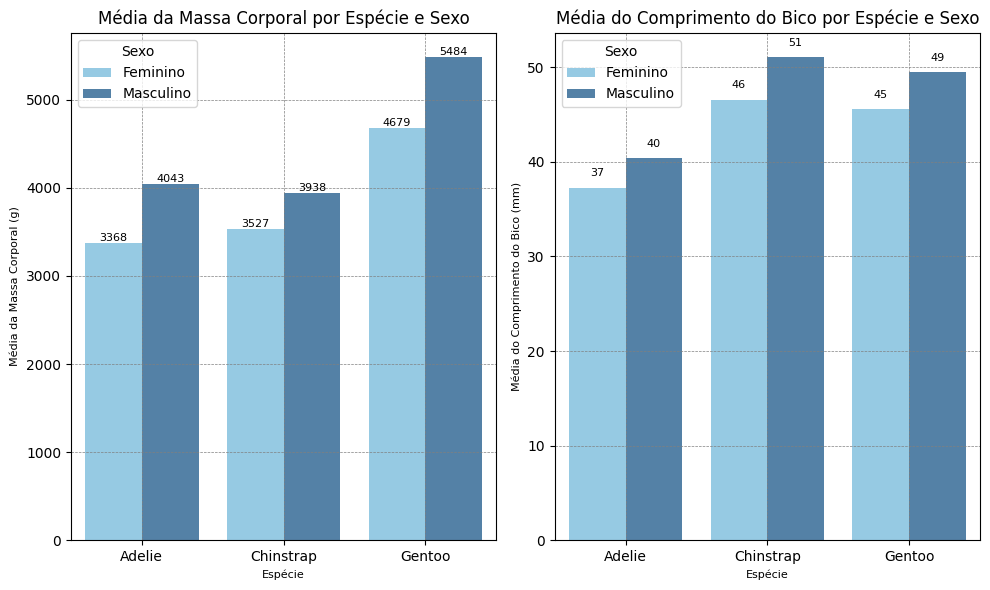

In [14]:
#03. Há diferente entre a dimensão dos bicos e massa corpórea entre os sexos, em cada espécie?
plt.figure(figsize=(10, 6))
palette = ['#89CFF0', '#4682B4']

#calculando as médias da massa corporal e do comprimento do bico para cada sexo e espécie
avg_mass = df.groupby(['especies', 'sexo'])['massa_corporal_g'].mean().reset_index()
avg_bill_length = df.groupby(['especies', 'sexo'])['comprimento_do_bico_mm'].mean().reset_index()

# Gráfico de barras para a massa corporal
plt.subplot(1, 2, 1)
#tipo de gráfico 
sns.barplot(x='especies', y='massa_corporal_g', hue='sexo', data=avg_mass, palette=palette)
plt.grid(True, linestyle='--', linewidth=0.5, color='grey')

#coloca os números em cima da barra
for p in plt.gca().patches:
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    plt.text(x, y + 1, int(y), ha='center', va='bottom', fontsize=8)
    
#legendas
plt.title('Média da Massa Corporal por Espécie e Sexo')
plt.xlabel('Espécie', fontsize = 8)
plt.ylabel('Média da Massa Corporal (g)', fontsize = 8)
plt.legend(title='Sexo')

# Gráfico de barras para o comprimento do bico
plt.subplot(1, 2, 2)
#tipo de gráfico 
sns.barplot(x='especies', y='comprimento_do_bico_mm', hue='sexo', data=avg_bill_length, palette=palette)
plt.grid(True, linestyle='--', linewidth=0.5, color='grey')

#coloca os números em cima da barra
for p in plt.gca().patches:
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    plt.text(x, y + 1, int(y), ha='center', va='bottom', fontsize=8)
#legendas
plt.title('Média do Comprimento do Bico por Espécie e Sexo')
plt.xlabel('Espécie', fontsize = 8)
plt.ylabel('Média do Comprimento do Bico (mm)', fontsize = 8)
plt.legend(title='Sexo')

plt.tight_layout()
plt.show()

04. Qual a relação entre a massa corporal e comprimento das nadadeiras, entre as espécies?

**Hipótese**: Pode ser que os pinguins que tem o tamanho das nadadeiras mais longas, também tem a massa corporal maior.

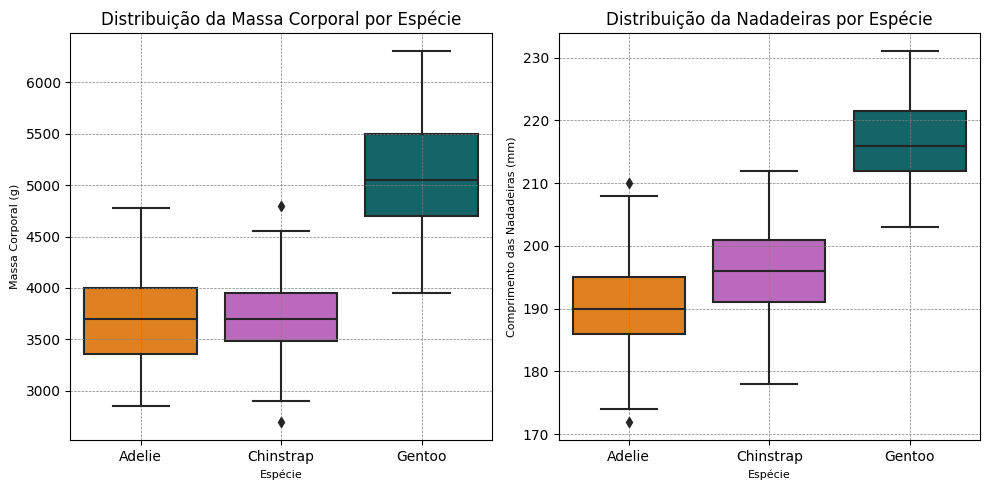

In [15]:
#04. Qual a relação entre a massa corporal e comprimento das nadadeiras, por espécies?
plt.figure(figsize=(10,5))
palette = [ '#FF8100','#C95BCB','#067176']

# Boxplot para a massa corporal por espécie
plt.subplot(1, 2, 1)
#tipo de gráfico 
sns.boxplot(x='especies', y='massa_corporal_g', data=df, palette=palette)
plt.grid(True, linestyle='--', linewidth=0.5, color='grey')

#legendas
plt.title('Distribuição da Massa Corporal por Espécie')
plt.xlabel('Espécie', fontsize = 8)
plt.ylabel('Massa Corporal (g)', fontsize = 8)

# Boxplot para o comprimento das nadadeiras por espécie
plt.subplot(1, 2, 2)
#tipo de gráfico 
sns.boxplot(x='especies', y='comprimento_do_nadadeira_mm', data=df, palette=palette)
plt.grid(True, linestyle='--', linewidth=0.5, color='grey')

#legendas
plt.title('Distribuição da Nadadeiras por Espécie')
plt.xlabel('Espécie', fontsize = 8)
plt.ylabel('Comprimento das Nadadeiras (mm)', fontsize = 8)

plt.tight_layout()
plt.show()

## 03. Insights

01. Como temos duas espécies nas ilhas Dream e Biscoe, os dados mostram que não tem alteração expressiva entre os valores médios da espécie Adelie.

02. Segundo os dados não tem correlação clara entre o comprimento dos bicos e a massa corporal. Por exemplo a espécie Chinstrap tem a maior média de comprimento de bico, mas a sua massa corporal é aproximadamente igual à de outras espécies estudadas e que tem o bico com comprimento menor.

03. Os dados indicam que os machos tem a média de massa corporal maior do que as fêmeas, em todas as espécies, e também os machos tem a dimensão dos bicos maiores do que as fêmeas. Lembrando que faltam de alguns dados, especialmente sexo dos pinguins.


## 04. Salvamento de dados e dicionário

In [16]:
df.to_csv("../data/processed/data.csv", index=False)
dt_dict.to_csv("../data/external/new_dictionary.csv", index=False)

df

,especies,ilha,comprimento_do_bico_mm,profundidade_do_bico_mm,comprimento_do_nadadeira_mm,massa_corporal_g,sexo
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Masculino
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Feminino
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Feminino
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Feminino
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Masculino
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Feminino
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Feminino
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Masculino
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Feminino
